In [1]:
import pandas as pd
import numpy as np

In [2]:
p1 = pd.read_csv('../data/problem1.csv', index_col=0)
# p1

In [3]:
stockCodes = p1['StockCode'].tolist()
sqlCodesList = '(' + ','.join(list(map(lambda x: '\'' + x + '\'', stockCodes))) + ')'
# sqlCodesList

In [4]:
# config FileSync database
import os
import configparser
import pandas as pd
import sqlalchemy as sa

from sqlalchemy.ext.declarative import declarative_base

In [5]:
import cx_Oracle   
cx_Oracle.init_oracle_client(lib_dir=r"../FileSync/instantclient_19_8")
# cx_Oracle.init_oracle_client(lib_dir=r"../FileSync/instantclient_19_8")

conn = cx_Oracle.connect('student2001212376', 'student2001212376', '219.223.208.52/orcl')

cursor = conn.cursor()

In [6]:
query = f'''
SELECT S_INFO_WINDCODE, TRADE_DT, S_DQ_ADJCLOSE
FROM FILESYNC.AShareEODPrices
WHERE (TRADE_DT BETWEEN 20200430 AND 20200630)
AND S_INFO_WINDCODE IN {sqlCodesList}
'''
cursor.execute(query)
data = cursor.fetchall()
# print(data)

In [7]:
prices = pd.DataFrame(data)
prices.columns = ['StockCode', 'date', 'price']
# prices

In [8]:
allStocks = prices.pivot_table(index='date', columns='StockCode')['price']
# allStocks

In [9]:
# prices.to_csv('../data/prices.csv')
# allStocks.to_csv('../data/allStocks.csv')

In [10]:
def createPortofolio(name, code):
    sectorCol= 'SectorCode' + code
    sectorStocks = p1[p1['SectorCode'] == name]

    allStocks[sectorCol] = 0
    for i, row in enumerate(sectorStocks.iterrows()):
        stockCode = row[1]['StockCode']
        weightInSector = row[1]['WeightInSectorPortofolio']
        allStocks[sectorCol] += allStocks[stockCode] * weightInSector

In [11]:
sectorCodePair = [['非银金融', '1'],
                  ['银行', '2'],
                  ['食品饮料', '3'],
                  ['医药生物', '4'],
                  ['电子', '5']]

for [sec, code] in sectorCodePair:
    createPortofolio(name = sec, code = code)

In [12]:
allStocks.index.name = 'TradeDate'
portFolioStocks = allStocks[['SectorCode1', 
                             'SectorCode2', 
                             'SectorCode3', 
                             'SectorCode4', 
                             'SectorCode5']].reset_index().set_index('TradeDate')

# portFolioStocks

In [13]:
portFolioStocksReturn =(portFolioStocks.pct_change(1).fillna(method='bfill') + 1).cumprod()
portFolioStocksReturn.index = pd.to_datetime(portFolioStocksReturn.index)
# portFolioStocksReturn

<AxesSubplot:xlabel='TradeDate', ylabel='return'>

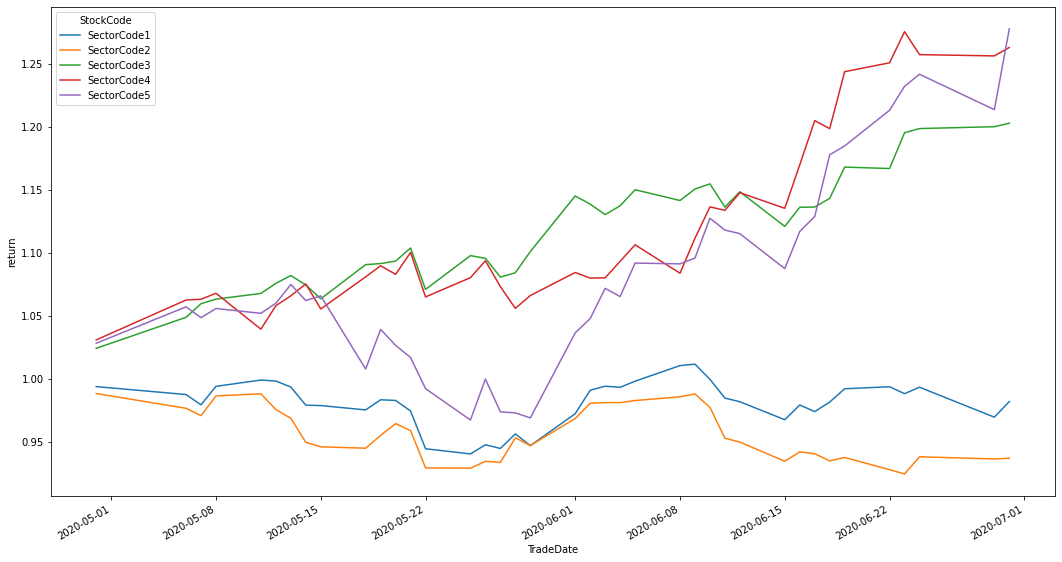

In [14]:
plot = portFolioStocksReturn.plot(ylabel='return', figsize=(18, 10))
plot

In [15]:
fig = plot.get_figure()
fig.savefig("../img/problem2.png")

In [16]:
portFolioStocksReturn.to_csv('../data/problem2.csv')